<a href="https://colab.research.google.com/github/CyShahedB/AiMl_Module4_shahed/blob/main/Mohammad_Shahed_Module_5_Assignment_2_(AIML)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

1.Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

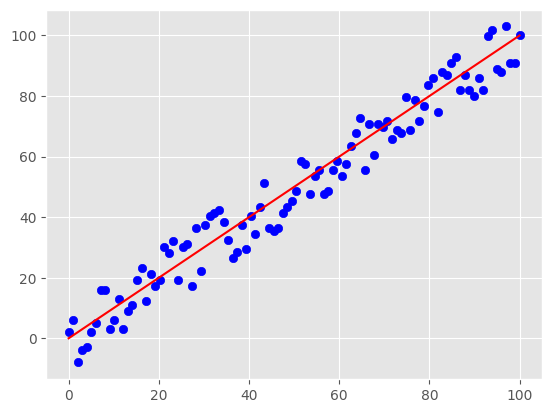

In [45]:
np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

In [46]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))


MSE is: 38.68
RMSE is: 6.219324722186485
MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

But the choice of the best loss function depends on the specific characteristics of the data and the goals of the regression task. MAE is often preferred when the dataset contains outliers, as it does not heavily penalize them. MSE and RMSE are commonly used when you want to give more weight to larger errors and when the errors are normally distributed.

2)Explore other loss functions and try to understand when and why they are used.

**Hinge Loss:**

Support Vector Machines (SVM) and binary classification tasks.

Encourages correct classification of training examples by maximizing the margin between classes. It penalizes predictions that are close to the decision boundary.

**Huber loss:**

Regression problems with outliers.

Combines the best properties of Mean Squared Error (MSE) and Mean Absolute Error (MAE). It is less sensitive to outliers than MSE and provides a balance between handling outliers and accurately predicting the data.

**Log-Cosh Loss:**

Regression problems.

Similar to Huber loss, it addresses the sensitivity to outliers. It is the logarithm of the hyperbolic cosine of the prediction error. It behaves like MSE for small errors and like MAE for large errors.

It has a similar insensitivity to outliers but is smoother. It is based on the hyperbolic cosine function, which is twice continuously differentiable.

Formula: LLog-Cosh​(y,y^​)=log(cosh(y^​−y)) Log-Cosh loss is useful when you want a smooth loss function that is robust to outliers.

**Quantile Loss (Pinball Loss): **

Quantile loss is used in quantile regression, where the goal is to predict a specific quantile of the target distribution. It allows modeling different quantiles of the distribution, providing a more complete picture of the uncertainty in predictions.

Formula:Lτ​(y,y^​)=(τ−I(y≤y^​))⋅(y^​−y) where τ is the target quantile, and I is the indicator function. Quantile loss is valuable when you want to estimate prediction intervals and capture the distribution's variability.

**Poisson Loss:**

Poisson loss is used when the target variable follows a Poisson distribution, such as in count data. It is suitable for regression tasks where the response variable represents counts.

Formula:LPoisson​(y,y^​)=y^​−y⋅log(y^​) Use Poisson loss when the response variable represents count data. Choosing the right loss function depends on the nature of your data, the distribution of the target variable, and the specific goals of your regression task. Experimenting with different loss functions can help identify the one that best aligns with your modeling objectives.

3)Try out KNN-regression on other datasets see which values of K give the best results.

In [47]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [48]:
train_path = "/content/IRIS.csv"
train = pd.read_csv(train_path)

In [49]:
def preprocess(df):
  mean_weight = df['sepal_width'].mean()
  df['sepal_width'].fillna(mean_weight,inplace=True)

  mode_size = df['petal_width'].mode()
  df['petal_width'].fillna(mode_size,inplace=True)

  #df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [50]:
train , test = train_test_split(train, test_size = 0.5)

x_train = train.drop('sepal_width', axis=1)
y_train = train['petal_width']

x_test = test.drop('sepal_width', axis = 1)
y_test = test['petal_width']

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [52]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

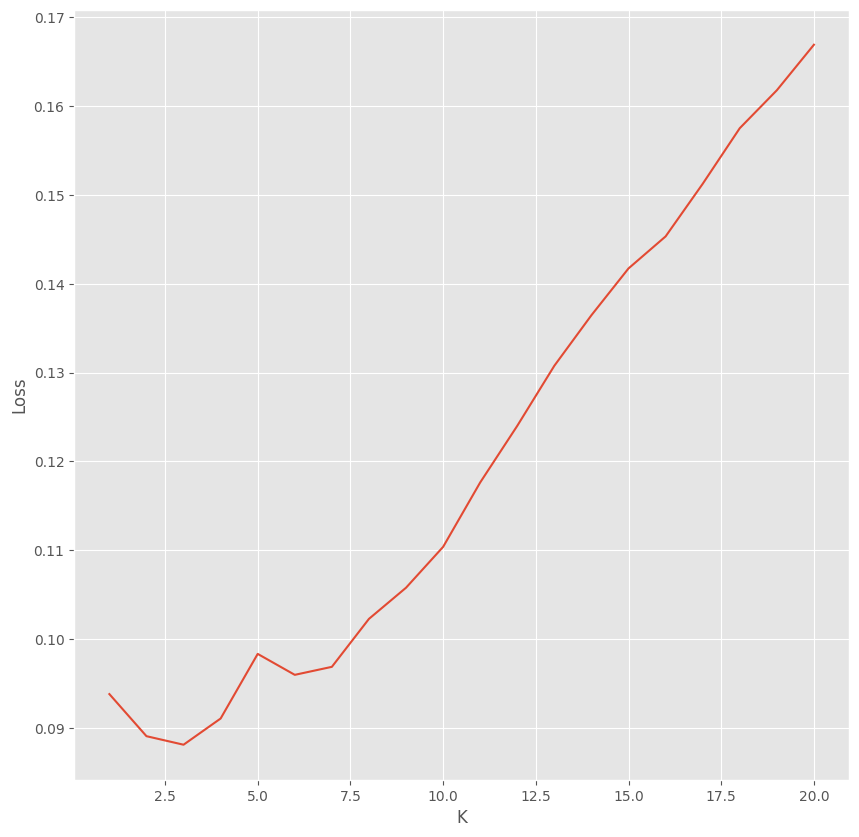

Minimum error 0.0881076782293289 is at k = 2


In [53]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

In this, K=1,2,3 gives least error on the iris dataset.this means that for other dataset the value for k changes.so k is a hyperparameter its value depends on the dataset.

In the context of k-Nearest Neighbors (KNN) algorithm, the parameter "k" represents the number of nearest neighbors used for making predictions.  Here k=3 gives less error, it suggests that the model is fitting the training data very closely and is likely capturing the noise or fluctuations present in the data. Here are some key points to consider:

>Lower loss at k=2 suggests a good balance between bias and variance.

>a consistent low loss on both the training and validation/test datasets, it indicates that the model is likely performing well.

>To determine the optimal value for k, you typically perform model evaluation on a separate validation or test dataset. This involves trying different values of k and assessing the model's performance on data it hasn't seen during training. A value of k that gives the best performance on such unseen data is usually chosen.

finally, while a lower error on the training data may suggest good fit, it's crucial to consider the trade-off between bias and variance. The goal is to find a balance that minimizes both training and generalization errors, leading to a model that performs well on new, unseen data.